# ========= Data Analysis of Fortran Rodwell Outputs =========

### Read through non-table data

Do not touch this code unless debugging

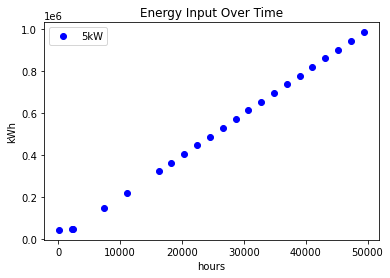

In [2]:
# NON TABLE DATA
import numpy as np 
import pandas as pd 
import numpy.linalg as la 
import matplotlib.pyplot as plt
from io import StringIO

# Helper Functions 
def minusparse(line):
    newline = ""
    for i in range(len(line)):
        if(line[i] == '-'):
            newline += " " + line[i]
        else:
            newline += line[i]
    return newline

def equalparse(line):
    temp = [x.strip() for x in line.split("=")]
    temp[-1] = temp[-1][:-1]
    return temp 
# END HELPER FUNCTIONS

# Open file 
def nontabledata(file_name):
    cnt = 0 
    f = open(file_name, "r")
    data = ""
    features = [str(i) for i in range(0, 14)]

    # Get non-tables 
    for _ in range(22):
        prevline1 = ""
        prevline2 = ""
        line = f.readline()

        # get position
        if(len(line.split()) == 0):
            line = 'NONE'
        while(line.split()[0] != "TOTAL"):
            prevline2 = prevline1
            prevline1 = line
            line = f.readline()
            if(len(line.split()) == 0):
                line = 'NONE'

        # get hours 
        prevline2 = minusparse(prevline2)
        hours = [x for x in prevline2.split(" ") if x != ''][0]

        # get non-table 
        newline = minusparse(line)
        newline = equalparse(newline)
        data += str(hours)
        while newline[0] != '':        
            # add to data 
            data += "," + newline[1]

            # update 
            newline = minusparse(f.readline())
            newline = equalparse(newline)
        cnt += 1
        data += '\n'

    # Convert to pandas object 
    TESTDATA = StringIO(data)
    df = pd.read_csv(TESTDATA, header=None)
    df.columns = features
    
    return df 

# DF mapping 
'''
  0 - hours 
  1 - TOTAL ENERGY INPUT BTU 
  2 - SEASONAL ENERGY INPUT BTU 
  3 - SEASONAL ENERGY INPUT GAL FUEL 
  4 - SEASONAL ENERGY RATE BTU/HR
  5 - TOTAL ENERGY INPUT GAL FUEL 
  6 - AVERAGE LB. WATER PER LB. FUEL
  7 - SEASONAL LB. WATER PER LB. FUEL
  8 - ENERGY FROM AIR TO ICE BTU
  9 - SEASONAL ENERGY LOSS, AIR TO ICE BTU 
  10 - TOTAL WATER WITHDRAWN GAL
  11 - SEASONAL WATER WITHDRAWN GAL 
  12 - TOTAL WATER LOSS GAL
  13 - SEASONAL WATER LOSS GAL
'''

#Graph data for each column vs hours 
#for name in features: 
#    plt.scatter(df["0"], df[name])
#    plt.xlabel("hours")
#    plt.ylabel(name)
#    plt.title(name + " vs. hours")
#    plt.show()
 
df = nontabledata("OUTPUT_MARS_CORRECT.DAT")
# df2 = nontabledata("3_10kW_68deg_10Gal_MF REDONE.DAT")
# df3 = nontabledata("4_15kW_68deg_10Gal_MF REDONE.DAT")
kWh_5 = df["1"] / 3412 * 10**9
# kWh_10 = df2["1"] / 3412 * 10**9
# kWh_15 = df3["1"] / 3412 * 10**9

plt.plot(df["0"], kWh_5, 'bo', label = '5kW')
# plt.plot(df2["0"], kWh_10, 'ro', label = '10kW')
# plt.plot(df3["0"],kWh_15, 'go', label = '15kW')


plt.xlabel("hours")
plt.ylabel("kWh")
plt.title("Energy Input Over Time")


leg = plt.legend()

### Read through table data:

Do not touch this code unless debugging

In [3]:
# READING FROM TABLES
import numpy as np 
import pandas as pd 
import numpy.linalg as la 
import matplotlib.pyplot as plt
from io import StringIO

# Helper Functions 
def minusparse(line):
    newline = ""
    for i in range(len(line)):
        if(line[i] == '-'):
            newline += " " + line[i]
        else:
            newline += line[i]
    return newline

def dataparse(line):
    temp = [x for x in line.split(" ") if x != '']
    temp[-1] = temp[-1][:-1]
    string_temp = ""
    for item in temp:
        string_temp += "," + item
    return string_temp 
# END HELPER FUNCTIONS

# Open output file from FORTRAN code
def tabledata(file_name):
    cnt = 0 
    f = open(file_name, "r")
    for _ in range(15): # eliminate beginning text 
        __ = f.readline()

    # Get first table 
    data = "" 
    features = [x for x in f.readline().split(" ") if x != '']
    features[-1] = features[-1][0:2]
    for _ in range(29):
        newline = minusparse(f.readline())
        temp = [x for x in newline.split(" ") if x != '']
        temp[-1] = temp[-1][:-1]
        string_temp = ""
        for item in temp:
            string_temp += "," + item
        data += str(cnt) + string_temp + "\n"
        cnt += 1

    # Get tables 
    for _ in range(21):
        line = f.readline()
        if(len(line.split()) == 0):
            line = 'NONE'
        while(line.split()[0] != "START"):
            line = f.readline()
            if(len(line.split()) == 0):
                line = 'NONE'
        line = f.readline() # eliminate empty line 
        line = f.readline() 

        newline = minusparse(line)
        while newline != '\n':
            data += str(cnt) + dataparse(newline) + "\n"
            newline = minusparse(f.readline())
            cnt += 1

    # Convert to pandas object 
    TESTDATA = StringIO(data)
    df = pd.read_csv(TESTDATA, names=features)

    return df

# ========================== Plotting ==========================

### Input your .DAT files here:

In [ ]:
df1 = tabledata("50_7.5kW_68_33gal_AB.DAT") #<------------------- Your file name here
df2 = tabledata("50_7.5kW_68_33gal_AB.DAT") #<------------------- Your file name here
df3 = tabledata("50_7.5kW_68_33gal_AB.DAT") #<------------------- Your file name here
df4 = tabledata("50_7.5kW_68_33gal_AB.DAT") #<------------------- Your file name here
df5 = tabledata("50_7.5kW_68_33gal_AB.DAT") #<------------------- Your file name here
df6 = tabledata("50_7.5kW_68_33gal_AB.DAT") #<------------------- Your file name here
df7 = tabledata("50_7.5kW_68_33gal_AB.DAT") #<------------------- Your file name here
df8 = tabledata("50_7.5kW_68_33gal_AB.DAT") #<------------------- Your file name here
df9 = tabledata("50_7.5kW_68_33gal_AB.DAT") #<------------------- Your file name here
df9 = tabledata("50_7.5kW_68_33gal_AB.DAT") #<------------------- Your file name here
df10 = tabledata("50_7.5kW_68_33gal_AB.DAT") #<------------------ Your file name here

Plot height vs diameter

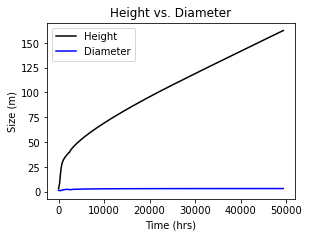

In [7]:
H = (df1["HWB"] - 60) /3.281 #<---------------------------------- Grab height of well
D = (df1["D"]) / 3.281 #<---------------------------------------- Grab diameter of well

fig = plt.figure(figsize=(8, 6), tight_layout=True) #<----------- Create figure
ax1 = fig.add_subplot(221) #<------------------------------------ Create optional subplotting functionality
ax1.plot(df1["TIME"], H, 'k-', label='Height') #<---------------- Plot Height
ax1.plot(df1["TIME"], D, 'b-', label='Diameter') #<-------------- Plot Diameter
ax1.set_xlabel('Time (hrs)') #<---------------------------------- xlabel
ax1.set_ylabel('Size (m)') #<------------------------------------ ylabel
ax1.set_title('Height vs. Diameter') #<-------------------------- title
ax1.legend() #<-------------------------------------------------- legend

Plot Rodwell parabola over time

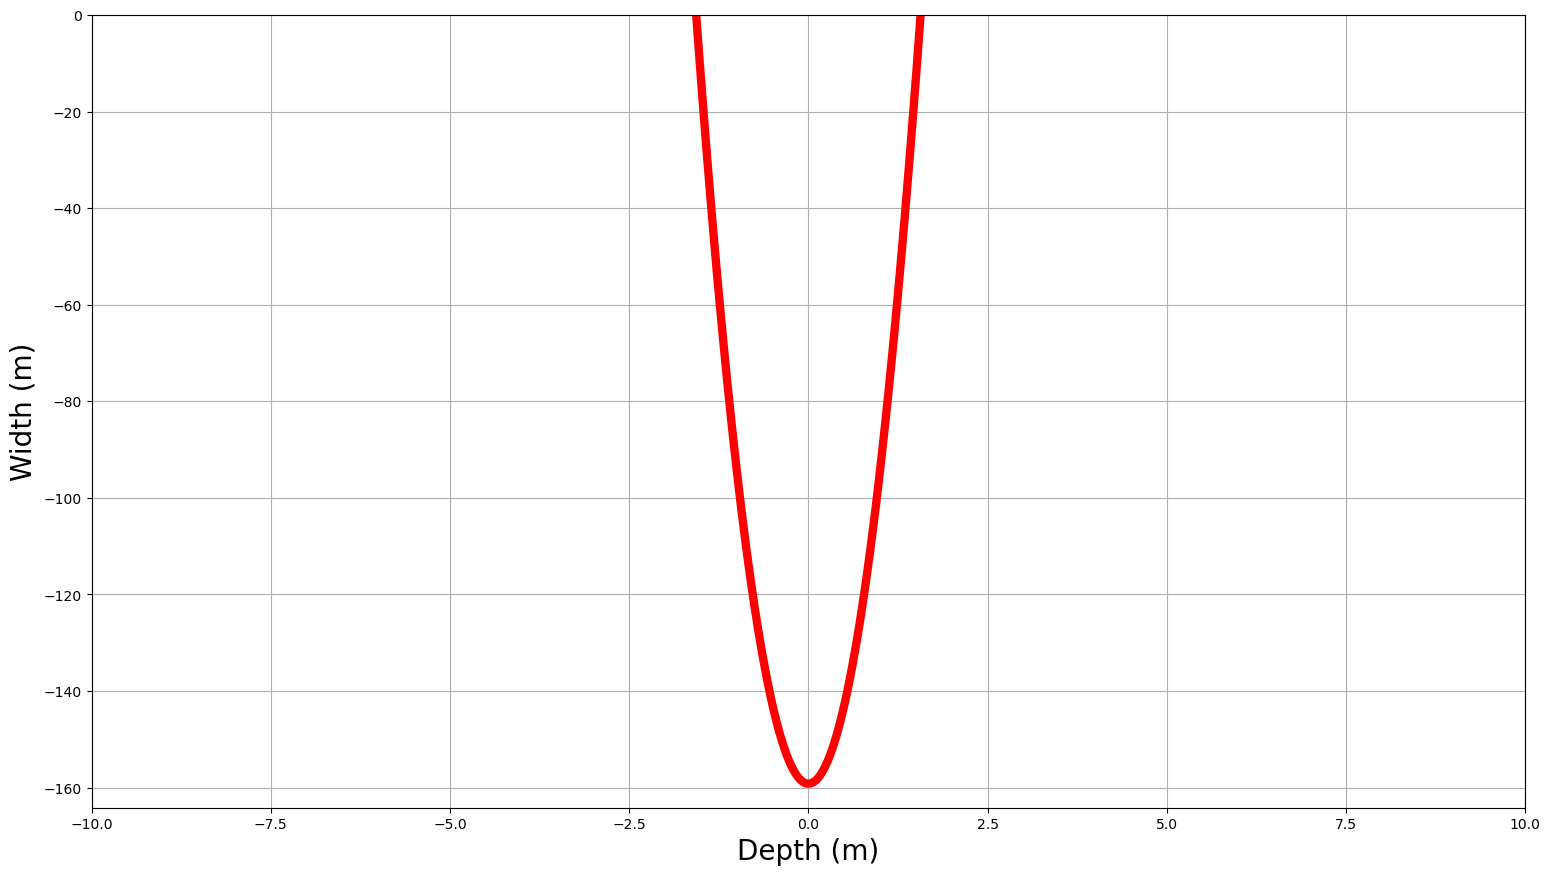

Final Radius: 1.565071624504724
Final Height: 159.1801280097531
Final Volume: 612.4591985895372


In [16]:
#function to create A, B, C values of equation of parabola: Ax^2+Bx+C
def calc_parabola_vertex(x1, y1, x2, y2, x3, y3):
    denom = (x1-x2) * (x1-x3) * (x2-x3)
    A     = (x3 * (y2-y1) + x2 * (y1-y3) + x1 * (y3-y2)) / denom
    B     = (x3*x3 * (y1-y2) + x2*x2 * (y3-y1) + x1*x1 * (y2-y3)) / denom
    C     = (x2 * x3 * (x2-x3) * y1+x3 * x1 * (x3-x1) * y2+x1 * x2 * (x1-x2) * y3) / denom
    return A,B,C

#initialize arrays to store data from Rodwell code
x1 = np.array([]) #<--------------------------------------------- Store x of the right x-intercept
x2 = np.array([]) #<--------------------------------------------- Store x of the left x-intercept
x3 = np.array([]) #<--------------------------------------------- Store x of the y-intercept
y1 = np.array([]) #<--------------------------------------------- Store y of the right x-intercept
y2 = np.array([]) #<--------------------------------------------- Store y of left x-intercept 
y3 = np.array([]) #<--------------------------------------------- Store y of the y-intercept

#loop through Rodwell data to extract diameter and height of well at each time step
for i in range(3, len(D)-1):
    x1 = np.append(x1,D[i]/2)
    x2 = np.append(x2,-D[i]/2)
    x3 = np.append(x3, 0)
    y1 = np.append(y1, 0)
    y2 = np.append(y2, 0)
    y3 = np.append(y3,-H[i])
    
#intitilaze arrays to store A,B,C
A = np.array([])
B = np.array([])
C = np.array([])

#generate A,B,C for each time step
for i in range(len(x1)-1):
    a, b, c = calc_parabola_vertex(x1[i], y1[i], x2[i], y2[i], x3[i], y3[i])
    A = np.append(A, a)
    B = np.append(B, b)
    C = np.append(C, c)

#start plotting
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import time
#allow for "Animation"
from IPython.display import clear_output

#loop through x steps
x=10
for i in range(10, len(x1)-1, x):
    #clear the last plot
    clear_output(wait=True)
    #create new plot
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(18.5, 10.5) 
    fig.set_dpi(100)
    plt.clf()
    #Determine how fast to animate
    time.sleep(0.01)
    
    #create x values of parabola based on dimensions of well at each time step
    x = np.linspace(x2[i], x1[i], 100)
    #generate the parabola
    y = (A[i]*x**2)+(B[i]*x)+C[i]
    
    #Plot the parabola
    plt.xlim([-10,10])
    plt.ylim([y3[-1]-2,0])
    plt.xlabel("Depth (m)", fontsize = 20)
    plt.ylabel("Width (m)", fontsize = 20)
    plt.grid()
    plt.plot(x, y, c = 'r', linewidth = 6) #can change linewidth here
    plt.show()
    
    #extract radius and height
    Radius = x1[i]
    Height = -y3[i]
    
    #compute volume of well
    v = np.pi*Radius**2*Height/2

    #print values
    print("Final Radius: "+str(Radius))
    print("Final Height: "+str(Height))
    print("Final Volume: "+str(v))

